In [18]:
import pandas as pd #for dealing with csv import
import os # for joining paths and filenames sensibly
import numpy as np #for the population std
import glob # for finding csv data Çfiles
import scipy.stats

## Data processing

In [19]:
os.getcwd()

'C:\\Users\\david\\OneDrive\\Documentos\\GitHub\\OpenBrains\\Diana_analysis'

In [20]:
#path_folder_all = 'C:\\Users\\David\\Desktop\\OpenBrains\\balanced_brains\\diana_sopeña'
#path_folder_all = 'C:\\Users\\David\\Desktop\\OpenBrains\\balanced_brains\\diana_adella'
#path_folder_all = 'C:\\Users\\David\\Desktop\\OpenBrains\\balanced_brains\\diana_Moli'
path_folder_all = 'C:\\Users\\David\\Desktop\\OpenBrains\\balanced_brains\\diana_all'
path_folder_all = 'C:\\Users\\david\Downloads\\diana_santgregori'


In [21]:
search_string=os.path.join(path_folder_all,'*.xlsx') 
files = glob.glob(search_string) #list of data files in the named location
files

['C:\\Users\\david\\Downloads\\diana_santgregori\\diana_sc.xlsx',
 'C:\\Users\\david\\Downloads\\diana_santgregori\\diana_sg2.xlsx',
 'C:\\Users\\david\\Downloads\\diana_santgregori\\diana_sg_c.xlsx',
 'C:\\Users\\david\\Downloads\\diana_santgregori\\diana_sg_san.xlsx']

In [22]:
#Get summary dataframe

summary=[]

for filenum, filename in enumerate(files):
    print(filename)
    ##
    filepath =os.path.join(path_folder_all,filename) 
    xl = pd.ExcelFile(filepath)
    sheet_names = xl.sheet_names
    ##
    for idx, group in enumerate(sheet_names):

        df_gx = pd.read_excel(filepath, sheet_name=sheet_names[idx])

        if not df_gx.iloc[:,1].isnull().iloc[1]:

            for idx1, label in enumerate(['càstig', 'recompensa', 'guiatge']): ##each feedback type

                points = df_gx.iloc[1:, 1+idx1][~df_gx.iloc[1:, 1+idx1].isnull()].values ## remove the nan and convert to array

                print([points.sum(), np.round(points.mean(),2), points.shape[0], label, group ]) ##control mechanism

                summary.append([points.sum(), np.round(points.mean(),2), points.shape[0], label, group, filenum ])
            #
            
#
df = pd.DataFrame(summary)
df.columns=['sum', 'mean_points', '#thorws', 'feedback_type', 'group', 'filenum' ]    
            

C:\Users\david\Downloads\diana_santgregori\diana_sc.xlsx
[700, 25.0, 28, 'càstig', 'G01']
[1000, 31.25, 32, 'recompensa', 'G01']
[1490, 48.06, 31, 'guiatge', 'G01']
[100, 7.14, 14, 'càstig', 'G02']
[330, 20.62, 16, 'recompensa', 'G02']
[850, 36.96, 23, 'guiatge', 'G02']
[140, 10.77, 13, 'càstig', 'G03']
[220, 16.92, 13, 'recompensa', 'G03']
[320, 17.78, 18, 'guiatge', 'G03']
[430, 39.09, 11, 'càstig', 'G04']
[750, 46.88, 16, 'recompensa', 'G04']
[970, 42.17, 23, 'guiatge', 'G04']
[0, 0.0, 14, 'càstig', 'G05']
[150, 10.0, 15, 'recompensa', 'G05']
[970, 42.17, 23, 'guiatge', 'G05']
[390, 35.45, 11, 'càstig', 'G06']
[340, 24.29, 14, 'recompensa', 'G06']
[180, 12.0, 15, 'guiatge', 'G06']
[600, 31.58, 19, 'càstig', 'G07']
[640, 35.56, 18, 'recompensa', 'G07']
[500, 26.32, 19, 'guiatge', 'G07']
C:\Users\david\Downloads\diana_santgregori\diana_sg2.xlsx
[260, 10.4, 25, 'càstig', 'G01']
[520, 18.57, 28, 'recompensa', 'G01']
[60, 4.62, 13, 'guiatge', 'G01']
[0, 0.0, 6, 'càstig', 'G02']
[330, 30.

In [23]:
df

,sum,mean_points,#thorws,feedback_type,group,filenum
0,700,25.00,28,càstig,G01,0
1,1000,31.25,32,recompensa,G01,0
2,1490,48.06,31,guiatge,G01,0
3,100,7.14,14,càstig,G02,0
4,330,20.62,16,recompensa,G02,0
...,...,...,...,...,...,...
73,680,35.79,19,recompensa,G06,3
74,480,26.67,18,guiatge,G06,3
75,470,21.36,22,càstig,G07,3
76,610,29.05,21,recompensa,G07,3


## Plots

In [24]:
import matplotlib.pyplot as plt  # Matplotlib's pyplot: MATLAB-like syntax
import seaborn as sns
sns.set_context("talk")

In [25]:
c_guiatge =  '#e59500'
c_recompensa= 'aquamarine' # '#002642'
c_castig= 'indianred'  # '#840032'

In [ ]:
sns.barplot(data=df, x="feedback_type", y="mean_points", 
            order=['càstig', 'recompensa'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,40)
plt.xlabel('')
plt.ylabel('punts / tirada');
plt.title('Eficiència', fontsize=22)

C:\Users\david\AppData\Local\Temp\ipykernel_30596\4033082248.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=df, x="feedback_type", y="mean_points",


Text(0.5, 1.0, 'Eficiència')

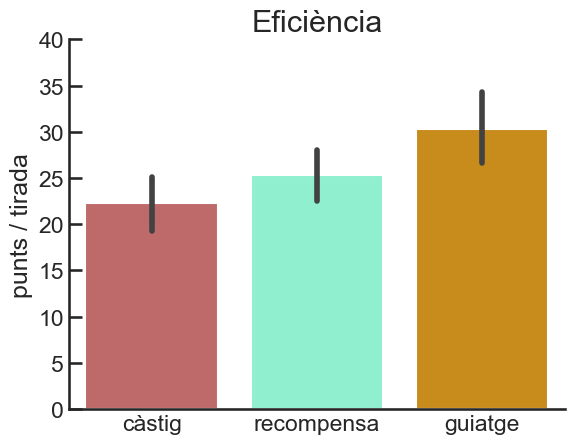

In [26]:
sns.barplot(data=df, x="feedback_type", y="mean_points", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,40)
plt.xlabel('')
plt.ylabel('punts / tirada');
plt.title('Eficiència', fontsize=22)

C:\Users\david\AppData\Local\Temp\ipykernel_30596\892595583.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=df, x="feedback_type", y="sum",
C:\Users\david\AppData\Local\Temp\ipykernel_30596\892595583.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=df, x="feedback_type", y="#thorws",
C:\Users\david\AppData\Local\Temp\ipykernel_30596\892595583.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=df, x="feedback_type", y="mean_points",


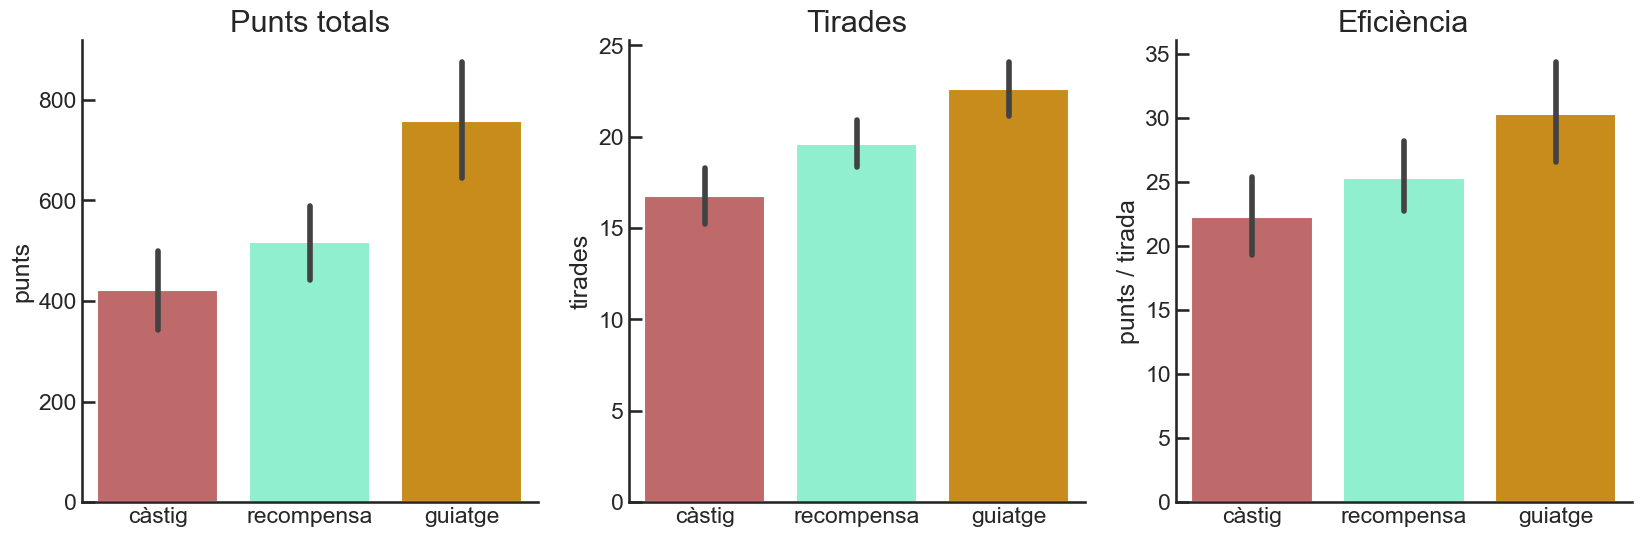

In [27]:
plt.figure(figsize=(20,6))

plt.subplot(131)
sns.barplot(data=df, x="feedback_type", y="sum", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('punts');
plt.title('Punts totals', fontsize=22)


plt.subplot(132)
sns.barplot(data=df, x="feedback_type", y="#thorws", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('tirades');
plt.title('Tirades', fontsize=22)


plt.subplot(133)
sns.barplot(data=df, x="feedback_type", y="mean_points", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('punts / tirada');
plt.title('Eficiència', fontsize=22);


In [28]:
from linares_plot import *

C:\Users\david\anaconda3\envs\python3\lib\site-packages\linares_plot.py:124: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  ci= bootstraps.ci(df.groupby(x).get_group(x_idx)[y], statfunction=statistic, n_samples=reps,  alpha=1-CI)    # calculate the bootstrap (data no subject base)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


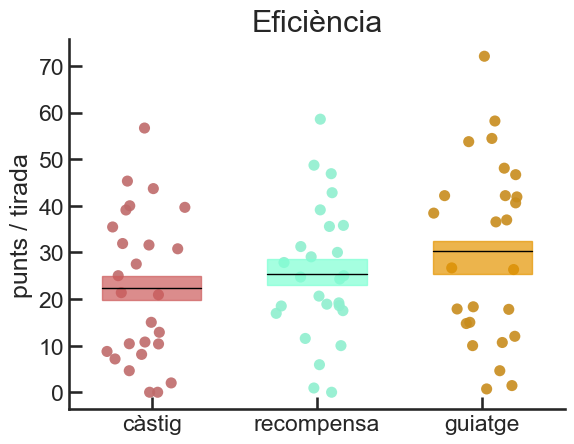

In [29]:
sns.set_context("talk")

linares_plot(x='feedback_type', y='mean_points', order=['càstig', 'recompensa', 'guiatge'], 
             df=df, palette=[c_castig, c_recompensa, c_guiatge], CI=0.68,  fill_box=True,  
             reps=100, alpha_box=0.7, alpha=0.9,  point_size=8, leg=False, sep_axis=False)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('punts / tirada');
plt.title('Eficiència', fontsize=22);


## Stats

In [30]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [31]:
###### Anova model
mod = ols(formula='mean_points ~ feedback_type', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print( '                                 ')
print( '                                 Anova Table')
print( '==============================================================================')
print( aov_table)
print( '==============================================================================')
print( '                                 ')
print( '                                 ')
print( '                                 ')

####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df['mean_points'].values, groups=df['feedback_type'].values,  alpha=0.05)
print( tukey.summary()    )



                                 
                                 Anova Table
                     sum_sq    df         F    PR(>F)
feedback_type    858.170256   2.0  1.528267  0.223589
Residual       21057.442815  75.0       NaN       NaN
                                 
                                 
                                 
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2   meandiff p-adj   lower    upper  reject
----------------------------------------------------------
 càstig    guiatge   8.0462 0.2003  -3.0661 19.1584  False
 càstig recompensa   3.0462 0.7899  -8.0661 14.1584  False
guiatge recompensa     -5.0 0.5319 -16.1122  6.1122  False
----------------------------------------------------------


In [32]:
C = df.loc[df['feedback_type']=='càstig', 'mean_points'].values
R = df.loc[df['feedback_type']=='recompensa', 'mean_points'].values
G = df.loc[df['feedback_type']=='guiatge', 'mean_points'].values

print(scipy.stats.ttest_ind(C, R))
print(scipy.stats.ttest_ind(C, G))
print(scipy.stats.ttest_ind(R, G))



Ttest_indResult(statistic=-0.7184009107916184, pvalue=0.47585389765078334)
Ttest_indResult(statistic=-1.632616277905886, pvalue=0.1088324578297113)
Ttest_indResult(statistic=-1.053530396587121, pvalue=0.29716266535519814)
